In [1]:
#Importing Files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading dataset

attr = ('age','sex','cp','trestbps','cholestrol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target')
data_heart = pd.read_csv("processed cleveland.csv",names=attr,na_values={ 'ca' : ['?'],'thal':['?']})

In [3]:
data_heart

,age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
## Exploratory Data Analysis

print('Instances :',data_heart.shape[0])
print('\nAttributes :',data_heart.shape[1])
print('\nNumber of nan values:\n',data_heart.isna().sum())
print('\nNumber of unique values:\n',data_heart.nunique())
print('\nNumber of unique values of target class:\n',data_heart['target'].value_counts())

Instances : 303

Attributes : 14

Number of nan values:
 age           0
sex           0
cp            0
trestbps      0
cholestrol    0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
target        0
dtype: int64

Number of unique values:
 age            41
sex             2
cp              4
trestbps       50
cholestrol    152
fbs             2
restecg         3
thalach        91
exang           2
oldpeak        40
slope           3
ca              4
thal            3
target          5
dtype: int64

Number of unique values of target class:
 0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64


In [5]:
# replacing 0 values with nan values

ndata_heart = data_heart.replace(0,np.NaN)

In [6]:
print('\nNumber of nan values:\n',ndata_heart.isna().sum())


Number of nan values:
 age             0
sex            97
cp              0
trestbps        0
cholestrol      0
fbs           258
restecg       151
thalach         0
exang         204
oldpeak        99
slope           0
ca            180
thal            2
target        164
dtype: int64


In [10]:
#Imputation using mode()

ndata_heart.fillna(ndata_heart.median(), inplace = True)

In [11]:
ndata_heart

,age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,1,145,233,1.0,2.0,150,1.0,2.3,3,1.0,6.0,1.0
1,67,1.0,4,160,286,1.0,2.0,108,1.0,1.5,2,3.0,3.0,2.0
2,67,1.0,4,120,229,1.0,2.0,129,1.0,2.6,2,2.0,7.0,1.0
3,37,1.0,3,130,250,1.0,2.0,187,1.0,3.5,3,1.0,3.0,2.0
4,41,1.0,2,130,204,1.0,2.0,172,1.0,1.4,1,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1.0,1,110,264,1.0,2.0,132,1.0,1.2,2,1.0,7.0,1.0
299,68,1.0,4,144,193,1.0,2.0,141,1.0,3.4,2,2.0,7.0,2.0
300,57,1.0,4,130,131,1.0,2.0,115,1.0,1.2,2,1.0,7.0,3.0
301,57,1.0,2,130,236,1.0,2.0,174,1.0,1.4,2,1.0,3.0,1.0


In [12]:
#descrption analysis

ndata_heart.describe()

,age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.0,303.000000,303.000000,303.000000,303.0,303.000000,303.000000,303.0,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,1.0,3.158416,131.689769,246.693069,1.0,1.986799,149.607261,1.0,1.497030,1.600660,1.257426,4.722772,2.016502
std,9.038662,0.0,0.960126,17.599748,51.776918,0.0,0.114325,22.875003,0.0,0.909092,0.616226,0.569422,1.938383,0.687922
min,29.000000,1.0,1.000000,94.000000,126.000000,1.0,1.000000,71.000000,1.0,0.100000,1.000000,1.000000,3.000000,1.000000
25%,48.000000,1.0,3.000000,120.000000,211.000000,1.0,2.000000,133.500000,1.0,1.000000,1.000000,1.000000,3.000000,2.000000
50%,56.000000,1.0,3.000000,130.000000,241.000000,1.0,2.000000,153.000000,1.0,1.400000,2.000000,1.000000,3.000000,2.000000
75%,61.000000,1.0,4.000000,140.000000,275.000000,1.0,2.000000,166.000000,1.0,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.0,4.000000,200.000000,564.000000,1.0,2.000000,202.000000,1.0,6.200000,3.000000,3.000000,7.000000,4.000000


In [13]:
#correlation matrix 

nc = ndata_heart.corr()
nc

,age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,NaN,0.104139,0.284946,0.208950,NaN,-0.084097,-0.393806,NaN,0.067094,0.161770,0.271346,0.128303,0.069659
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,0.104139,NaN,1.000000,-0.036077,0.072319,NaN,-0.071384,-0.334422,NaN,0.153804,0.152050,0.191653,0.262089,0.136402
trestbps,0.284946,NaN,-0.036077,1.000000,0.130120,NaN,-0.057995,-0.045351,NaN,0.170536,0.117382,0.119343,0.134424,0.059225
cholestrol,0.208950,NaN,0.072319,0.130120,1.000000,NaN,-0.033691,-0.003432,NaN,0.020705,-0.004062,0.117358,0.018351,0.004326
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.084097,NaN,-0.071384,-0.057995,-0.033691,NaN,1.000000,0.120829,NaN,-0.156492,-0.122080,-0.049354,-0.001627,-0.123530
thalach,-0.393806,NaN,-0.334422,-0.045351,-0.003432,NaN,0.120829,1.000000,NaN,-0.162901,-0.385601,-0.185923,-0.274142,-0.135941
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,0.067094,NaN,0.153804,0.170536,0.020705,NaN,-0.156492,-0.162901,NaN,1.000000,0.377939,0.261825,0.201720,0.262699


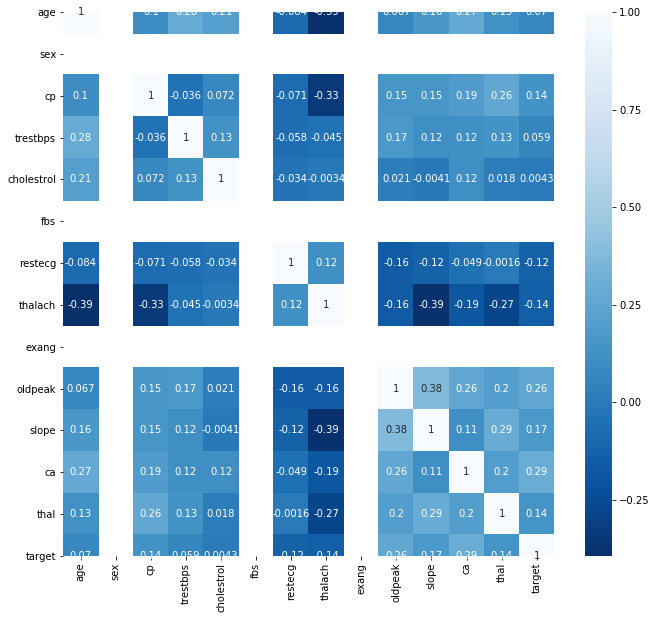

In [53]:
#Heatmap Of Correlation matrix

plt.figure(figsize=(11,10))
sns.heatmap(nc,annot=True,cmap=plt.cm.Blues_r);

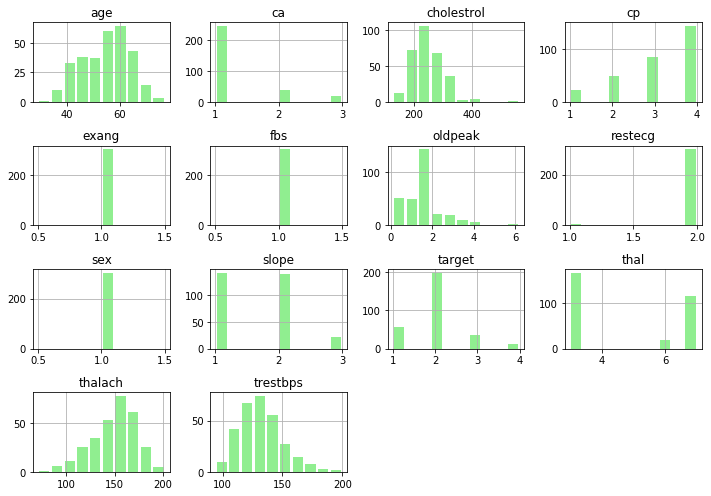

In [59]:
#Data Visualization
#Histogram plotting

ndata_heart.hist(rwidth=0.8,color='lightgreen',figsize=(10,7));
plt.tight_layout()

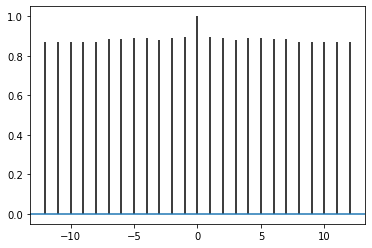

In [16]:
#Autocorrelation

plt.acorr(pd.to_numeric(ndata_heart.target,downcast='float'),maxlags=12);

C:\Users\vishn\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\vishn\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\vishn\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


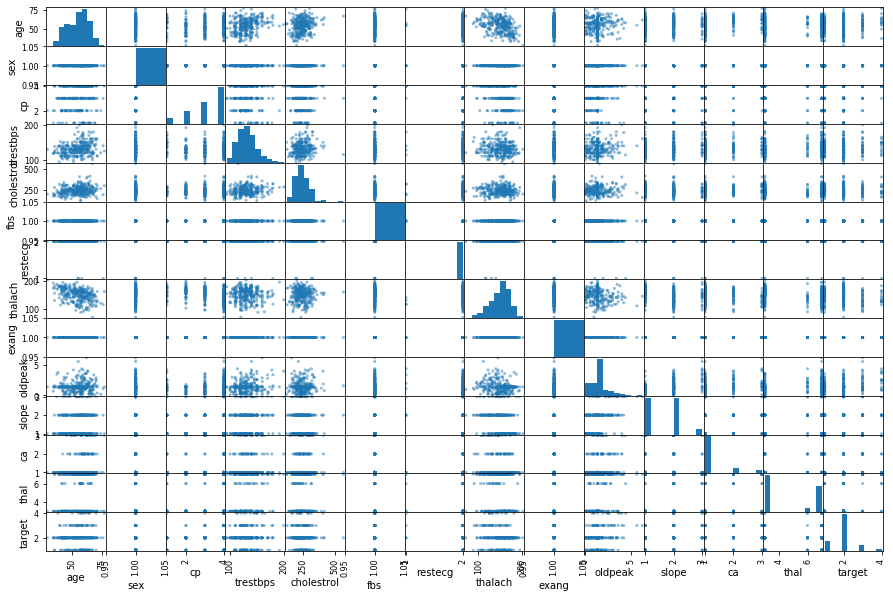

In [17]:
#Scatter plot

from pandas.plotting import scatter_matrix
scatter_matrix(ndata_heart,figsize=(15,10));

In [18]:
#Splitting dataset as x and y

x = ndata_heart.drop(columns=['target'])
y = ndata_heart['target']

In [20]:
x.dtypes

age             int64
sex           float64
cp              int64
trestbps        int64
cholestrol      int64
fbs           float64
restecg       float64
thalach         int64
exang         float64
oldpeak       float64
slope           int64
ca            float64
thal          float64
dtype: object

In [19]:
y

0      1.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
298    1.0
299    2.0
300    3.0
301    1.0
302    2.0
Name: target, Length: 303, dtype: float64

In [21]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

stdsclr =  StandardScaler()

In [22]:
#splitting the data for training and testing in 70:30 ratio 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [23]:
x_train_std = stdsclr.fit_transform(x_train)
x_test_std = stdsclr.fit_transform(x_test)

In [24]:
x_train

,age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
184,60,1.0,4,158,305,1.0,2.0,161,1.0,1.4,1,1.0,3.0
16,48,1.0,2,110,229,1.0,2.0,168,1.0,1.0,3,1.0,7.0
301,57,1.0,2,130,236,1.0,2.0,174,1.0,1.4,2,1.0,3.0
68,59,1.0,4,170,326,1.0,2.0,140,1.0,3.4,3,1.0,7.0
113,43,1.0,4,132,341,1.0,2.0,136,1.0,3.0,2,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1.0,4,152,223,1.0,2.0,181,1.0,1.4,1,1.0,7.0
165,57,1.0,4,132,207,1.0,2.0,168,1.0,1.4,1,1.0,7.0
188,54,1.0,2,192,283,1.0,2.0,195,1.0,1.4,1,1.0,7.0
192,43,1.0,4,132,247,1.0,2.0,143,1.0,0.1,2,1.0,7.0


In [25]:
x_train_std

array([[ 0.62262846,  0.        ,  0.90180062, ..., -1.01221733,
        -0.4608173 , -0.8947388 ],
       [-0.76886047,  0.        , -1.1551154 , ...,  2.22369003,
        -0.4608173 ,  1.17514128],
       [ 0.27475623,  0.        , -1.1551154 , ...,  0.60573635,
        -0.4608173 , -0.8947388 ],
       ...,
       [-0.073116  ,  0.        , -1.1551154 , ..., -1.01221733,
        -0.4608173 ,  1.17514128],
       [-1.34864753,  0.        ,  0.90180062, ...,  0.60573635,
        -0.4608173 ,  1.17514128],
       [ 1.55028775,  0.        ,  0.90180062, ...,  0.60573635,
         1.30419991,  1.17514128]])

In [26]:
x_test_std

array([[ 1.12034018,  0.        ,  0.83171585, ..., -0.90726471,
         1.31055608,  0.66474537],
       [-0.4143724 ,  0.        , -0.2484346 , ..., -0.90726471,
        -0.43685203, -0.88117409],
       [-1.74445663,  0.        , -0.2484346 , ...,  2.39187969,
        -0.43685203, -0.88117409],
       ...,
       [-1.33519994,  0.        ,  0.83171585, ..., -0.90726471,
        -0.43685203,  1.18005185],
       [ 0.09719846,  0.        ,  0.83171585, ...,  0.74230749,
        -0.43685203,  1.18005185],
       [-1.53982829,  0.        , -0.2484346 , ..., -0.90726471,
        -0.43685203, -0.88117409]])

In [27]:
#feature importances

from sklearn.ensemble import ExtraTreesClassifier

In [36]:
model = ExtraTreesClassifier()
model.fit(x,y)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

cholestrol    0.151431
trestbps      0.146369
thalach       0.139536
oldpeak       0.131872
age           0.129025
thal          0.097325
cp            0.079131
ca            0.064090
slope         0.052832
restecg       0.008389
sex           0.000000
fbs           0.000000
exang         0.000000
dtype: float64


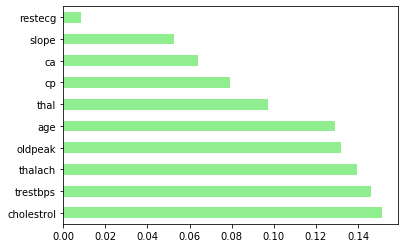

In [60]:
ft_importances = pd.Series(model.feature_importances_,x.columns)
print(ft_importances.nlargest(13))
ft_importances.nlargest(10).plot(kind='barh',color='lightgreen');

In [42]:
# dropping features based on to feature selection

ndata_heart.drop(columns=['sex','fbs','exang'])

,age,cp,trestbps,cholestrol,restecg,thalach,oldpeak,slope,ca,thal,target
0,63,1,145,233,2.0,150,2.3,3,1.0,6.0,1.0
1,67,4,160,286,2.0,108,1.5,2,3.0,3.0,2.0
2,67,4,120,229,2.0,129,2.6,2,2.0,7.0,1.0
3,37,3,130,250,2.0,187,3.5,3,1.0,3.0,2.0
4,41,2,130,204,2.0,172,1.4,1,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,2.0,132,1.2,2,1.0,7.0,1.0
299,68,4,144,193,2.0,141,3.4,2,2.0,7.0,2.0
300,57,4,130,131,2.0,115,1.2,2,1.0,7.0,3.0
301,57,2,130,236,2.0,174,1.4,2,1.0,3.0,1.0


In [46]:
#Calculating accuracy score using SVM Classifier

from sklearn.svm import SVC

models = SVC()
models.fit(x_train_std,y_train)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
models.score(x_test_std,y_test)

0.62